# Proyek Analisis Data: Analisis Review dan Penjualan E-Commerce

---
- **Nama:** Mirwanto Paulima Adveliften Sidabutar
- **Email:** mirwantosidabutar069@gmail.com
- **ID Dicoding:** Mirwanto Paulima Adveliftan Sidabutar

## Menentukan Pertanyaan Bisnis

*   Apakah konsumen puas dengan pembelian mereka di e-commerce kita?
*   Bagaimana kondisi pengiriman produk keseluruhan saat ini?
*   Apa kategori produk terlaris di e-commerce kita?
*   Bagaimana tren penjualan harian kita?
*   Apakah terdapat hubungan signifikan antara volume dan berat sebuah produk?





## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Data Wrangling

### Gathering Data

#### Mengupload semua dataset ke dalam Google Colab storage

In [4]:
#Sebelumnya data sudah harus diupload ke dalam google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Memanggil data set pelanggan
# Data telah diupload sebelumnya ke dalam drive Google Colab
customers_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Memanggil data set produk
# Data telah diupload sebelumnya ke dalam drive Google Colab
products_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# Memanggil data set order
# Data telah diupload sebelumnya ke dalam drive Google Colab
orders_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Memanggil data set review produk
# Data telah diupload sebelumnya ke dalam drive Google Colab
reviews_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# Memanggil data set pembayaran
# Data telah diupload sebelumnya ke dalam drive Google Colab
payments_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
# Memanggil data set geolocation
# Data telah diupload sebelumnya ke dalam drive Google Colab
geo_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# Memanggil data set sellers
# Data telah diupload sebelumnya ke dalam drive Google Colab
sellers_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
# Memanggil data set product category name translated
# Data telah diupload sebelumnya ke dalam drive Google Colab
category_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/product_category_name_translation.csv")
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
# Memanggil data set order item
# Data telah diupload sebelumnya ke dalam drive Google Colab
order_items_df = pd.read_csv("/content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**
- Sebelumnya semua data sudah diupload ke Google Collab sehingga pemanggilan data dilakukan dari drive Google Collab

### Assessing Data

#### Melihat informasi setiap dataset

In [14]:
print('\n', customers_df.info())
print('\n', products_df.info())
print('\n', orders_df.info())
print('\n', reviews_df.info())
print('\n', payments_df.info())
print('\n', geo_df.info())
print('\n', sellers_df.info())
print('\n', category_df.info())
print('\n', order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   pr

#### Pemeriksaan Missing Value

In [15]:
print('\nInfo missing value customers:\n', customers_df.isnull().sum())
print('\nInfo missing value products:\n', products_df.isnull().sum())
print('\nInfo missing value orders:\n', orders_df.isnull().sum())
print('\nInfo missing value order reviews:\n', reviews_df.isnull().sum())
print('\nInfo missing value order payments:\n', payments_df.isnull().sum())
print('\nInfo missing value geolocation:\n', geo_df.isnull().sum())
print('\nInfo missing value sellers:\n', sellers_df.isnull().sum())
print('\nInfo missing value product category:\n', category_df.isnull().sum())
print('\nInfo missing value order items:\n', order_items_df.isnull().sum())


Info missing value customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info missing value products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Info missing value orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Info missing value order reviews:
 review_id                      0
order_id                       0
review_

#### Pemeriksanaan Data Duplikat

In [16]:
print('Jumlah data duplikat customers:', customers_df.duplicated().sum())
print('Jumlah data duplikat products:', products_df.duplicated().sum())
print('Jumlah data duplikat orders:', orders_df.duplicated().sum())
print('Jumlah data duplikat reviws:', reviews_df.duplicated().sum())
print('Jumlah data duplikat payments:', payments_df.duplicated().sum())
print('Jumlah data duplikat geolocation:', geo_df.duplicated().sum())
print('Jumlah data duplikat sellers:', sellers_df.duplicated().sum())
print('Jumlah data duplikat product category:', category_df.duplicated().sum())
print('Jumlah data duplikat item order', order_items_df.duplicated().sum())

Jumlah data duplikat customers: 0
Jumlah data duplikat products: 0
Jumlah data duplikat orders: 0
Jumlah data duplikat reviws: 0
Jumlah data duplikat payments: 0
Jumlah data duplikat geolocation: 261831
Jumlah data duplikat sellers: 0
Jumlah data duplikat product category: 0
Jumlah data duplikat item order 0


**Insight:**
- *Missing value:* Missing value terdeteksi dari bagaimana terdapat perbedaan jumlah non-null data pada setiap dataset. Dataset yang terdapat perbedaan jumlah non-null adalah: products, orders, dan reviews.
- *Invalide class:* Terdapat data waktu (date and time) yang diberi label 'object'. Data tersebut antara lain:

1.   **`Dataset orders_df`**: `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`
2.   **`Dataset reviews_df`**: `review_creation_date`, `review_answer_timestamp`
3.   **`Dataset order_items_df`**: `shipping_limit_date`

- *Duplicates:* Terdapat data duplikat pada dataset geolocation.

### Cleaning Data

#### Menyelesaikan masalah date and time format

In [17]:
# Mengubah kolom di orders_df dalam format waktu
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Mengubah kolom di reviews_df dalam format waktu
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'])
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])

# Mengubah kolom di order_items_df dalam format waktu
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

print('\n', orders_df.info())
print('\n', reviews_df.info())
print('\n', order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dt

#### Menyelesaikan masalah missing value

In [18]:
# Mengisi missing value pada products_df dengan modus dan rata-rata
products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mode()[0])
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())

# Mengisi missing value pada orders_df dengan backward dan forward fill
orders_df['order_approved_at'] = orders_df['order_approved_at'].ffill()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].bfill()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].bfill()
orders_df['order_estimated_delivery_date'] = orders_df['order_estimated_delivery_date'].ffill()

# Memeriksa kembali missing value
print('\nInfo missing value products:\n', products_df.isnull().sum())
print('\nInfo missing value orders:\n', orders_df.isnull().sum())



Info missing value products:
 product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

Info missing value orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight:**

DATE AND TIME FORMAT
- Data diubah ke dalam bentuk waktu dan kemudian diperiksa apakah code sukses berjalan


---

MISSING VALUE
- Pada `product_df`, data numerik float akan diisi dengan mean sedangkan kolom variabel diskrit diisi dengan mode
- Pada `reviews_df`, tidak dilakukan pembersihan data, karena nanti tidak akan dimasukkan dalam data gabungan akhir untuk analisis karena tidak termasuk dalam bagian misi pertanyaan yang ingin dijawab oleh cohort.
- Pada `orders_df`, data waktu semuanya diganti dengan metode backward atau forward.

---

DUPLICATE
- Data `geolocation_df` yang terduplikasi tidak apa-apa, karena lokasi astronomis bisa saja sama karena perulangan.

## Exploratory Data Analysis (EDA)

###Statistika Deskriptif

In [19]:
print("Descriptive Statistics for Customers Dataset:")
print(customers_df.describe(include='all'))

print("\nDescriptive Statistics for Products Dataset:")
print(products_df.describe(include='all'))

print("\nDescriptive Statistics for Orders Dataset:")
print(orders_df.describe(include='all'))

print("\nDescriptive Statistics for Reviews Dataset:")
print(reviews_df.describe(include='all'))

print("\nDescriptive Statistics for Payments Dataset:")
print(payments_df.describe(include='all'))

print("\nDescriptive Statistics for Geolocation Dataset:")
print(geo_df.describe(include='all'))

print("\nDescriptive Statistics for Sellers Dataset:")
print(sellers_df.describe(include='all'))

print("\nDescriptive Statistics for Category Dataset:")
print(category_df.describe(include='all'))

print("\nDescriptive Statistics for Order Items Dataset:")
print(order_items_df.describe(include='all'))

Descriptive Statistics for Customers Dataset:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_

### Analisa `customer_df`

#### Periksa primary key

In [20]:
print(customers_df['customer_id'].nunique() == customers_df.shape[0])

True


#### Jumlah customer setiap kota

In [21]:
customer_city_count = customers_df.groupby('customer_city')['customer_id'].count().sort_values(ascending=False)
print(customer_city_count)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64


Jumlah customer setiap state

In [22]:
customer_state_count = customers_df.groupby('customer_state')['customer_id'].count().sort_values(ascending=False)
print(customer_state_count)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


### Analisa `products_df`

#### Periksa primary key

In [23]:
print(products_df['product_id'].nunique() == products_df.shape[0])

True


#### Pengelompokan berdasarkan panjang produk

In [24]:
products_df['product_length_cm'].describe()

,product_length_cm
count,32951.000000
mean,30.815078
std,16.913945
min,7.000000
25%,18.000000
50%,25.000000
75%,38.000000
max,105.000000


#### Volume Produk

In [25]:
products_df['product_volume_cm3'] = products_df['product_length_cm'] * products_df['product_width_cm'] * products_df['product_height_cm']
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


In [26]:
products_df['product_volume_cm3'].describe()

,product_volume_cm3
count,32951.000000
mean,16563.826178
std,27056.242763
min,168.000000
25%,2880.000000
50%,6840.000000
75%,18480.000000
max,296208.000000


#### Berat Produk

In [27]:
products_df['product_weight_g'].describe()

,product_weight_g
count,32951.000000
mean,2276.472488
std,4281.908773
min,0.000000
25%,300.000000
50%,700.000000
75%,1900.000000
max,40425.000000


#### Grouping dengan urutan dari volume produk terbesar

In [28]:
products_df.groupby('product_category_name').agg({
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean',
    'product_weight_g': 'mean',
    'product_volume_cm3': 'mean'
}).sort_values(by='product_volume_cm3', ascending=False)

,product_length_cm,product_height_cm,product_width_cm,product_weight_g,product_volume_cm3
product_category_name,,,,,
moveis_colchao_e_estofado,46.300000,34.400000,41.300000,13190.000000,77244.300000
moveis_escritorio,55.627832,41.864078,37.919094,12740.867314,75468.469256
moveis_cozinha_area_de_servico_jantar_e_jardim,47.340426,40.478723,38.680851,11598.563830,69406.095745
eletrodomesticos_2,45.733333,30.666667,38.166667,9913.333333,55476.311111
moveis_sala,50.730769,22.365385,44.429487,8934.846154,54486.128205
...,...,...,...,...,...
relogios_presentes,19.222724,10.292701,15.268623,509.287434,3470.398044
livros_tecnicos,27.325203,5.869919,18.463415,1107.845528,2758.991870
livros_importados,29.741935,3.451613,21.225806,596.774194,1935.387097


### Analisa `orders_df`

#### Waktu Diperlukan dari Purchase Approved - Delivered to Customer

In [29]:
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']).dt.days

print(orders_df['delivery_time'].describe())

count    99441.000000
mean        13.176155
std         40.613554
min       -643.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        678.000000
Name: delivery_time, dtype: float64


#### Statistik Deskriptif Status Order

In [30]:
orders_df.groupby('order_status')['delivery_time'].describe()

,count,mean,std,min,25%,50%,75%,max
order_status,,,,,,,,
approved,2.0,425.500000,161.927453,311.0,368.25,425.5,482.75,540.0
canceled,625.0,18.694400,234.526195,-527.0,-150.00,21.0,174.00,675.0
created,5.0,-190.800000,206.590658,-519.0,-217.00,-164.0,-90.00,36.0
delivered,96478.0,11.578422,10.946852,-511.0,6.00,9.0,15.00,312.0
invoiced,314.0,78.073248,231.321204,-446.0,-77.75,75.5,227.50,678.0
processing,301.0,145.119601,190.483750,-412.0,8.00,165.0,286.00,561.0
shipped,1107.0,44.249322,215.538447,-643.0,-97.00,45.0,199.00,592.0
unavailable,609.0,105.789819,203.825886,-528.0,-19.00,116.0,239.00,573.0


### Merge `customers_df` - `orders_df`

In [31]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,25
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,14
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11


#### Mengurutkan State dengan Waktu Pengiriman Rata-Rata Tersingkat ke Terlama

In [32]:
state_delivery_time = cust_orders_df.groupby('customer_state')['delivery_time'].mean()
sorted_state_delivery_time = state_delivery_time.sort_values()
print(sorted_state_delivery_time)

customer_state
SP     9.215877
PR    12.064420
MG    12.834207
DF    14.890654
ES    16.151008
RS    16.162093
RJ    16.185030
GO    16.381188
MS    16.432168
SC    16.635964
RN    17.416495
TO    17.900000
MT    18.590959
PE    19.111380
BA    19.452071
CE    19.650449
PI    20.440404
RO    20.450593
SE    20.460000
MA    21.629183
PB    22.998134
AC    23.283951
PA    23.816410
RR    26.956522
AL    28.050847
AP    28.544118
AM    28.594595
Name: delivery_time, dtype: float64


#### Tabel status pengiriman berdasarkan state

In [33]:
customer_state_order_status = cust_orders_df.groupby(['customer_state', 'order_status'])['order_id'].count().reset_index()
customer_state_order_status = customer_state_order_status.pivot(index='customer_state', columns='order_status', values='order_id').fillna(0)
customer_state_order_status


order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
customer_state,,,,,,,,
AC,0.0,0.0,0.0,80.0,0.0,0.0,1.0,0.0
AL,0.0,1.0,0.0,397.0,2.0,3.0,9.0,1.0
AM,0.0,0.0,0.0,145.0,0.0,0.0,2.0,1.0
AP,0.0,0.0,0.0,67.0,0.0,1.0,0.0,0.0
BA,0.0,16.0,0.0,3256.0,9.0,11.0,68.0,20.0
CE,0.0,7.0,0.0,1279.0,1.0,5.0,38.0,6.0
DF,0.0,7.0,1.0,2080.0,3.0,7.0,30.0,12.0
ES,0.0,9.0,0.0,1995.0,4.0,2.0,17.0,6.0
GO,0.0,13.0,0.0,1957.0,5.0,5.0,31.0,9.0


### Merge `payments_df` - `reviews_df`

In [34]:
payrev_df = pd.merge(
    left=payments_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


### Merge `cust_orders_df` - `payrev_df`

In [35]:
customers_df = pd.merge(
    left=cust_orders_df,
    right=payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Merge `order_items_df` - `sellers_df`

In [36]:
item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


### Merge `products_df` - `category_df`

In [37]:
product_df = pd.merge(
    left=products_df,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,housewares


### Merge `sellers_df` - `products_df`

In [38]:
sellers_pro_df = pd.merge(
    left=products_df,
    right=sellers_df,
    how="left",
    left_on="product_id",
    right_on="seller_id"
)
sellers_pro_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,NaN,NaN,NaN,NaN
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,NaN,NaN,NaN,NaN
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,NaN,NaN,NaN,NaN
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,NaN,NaN,NaN,NaN
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,NaN,NaN,NaN,NaN


### Merge Semua Data yang Ingin di Export Menjadi all_data.py

In [39]:
all_data_df = pd.merge(
    left=customers_df,
    right=order_items_df, # Changed from sellers_df to order_items_df
    how="left",
    on="order_id" # removed redundant left_on and right_on parameters
)
all_data_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,2018-06-15,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,NaN,NaN,2018-03-29,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


**Insight:**
- Seller dengan harga tertinggi adalah: 489ae2aa008f021502940f251d4cce7f
- Beberapa metode merger data tidak kuat untuk dijalankan di komputer

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah konsumen puas dengan pembelian mereka?

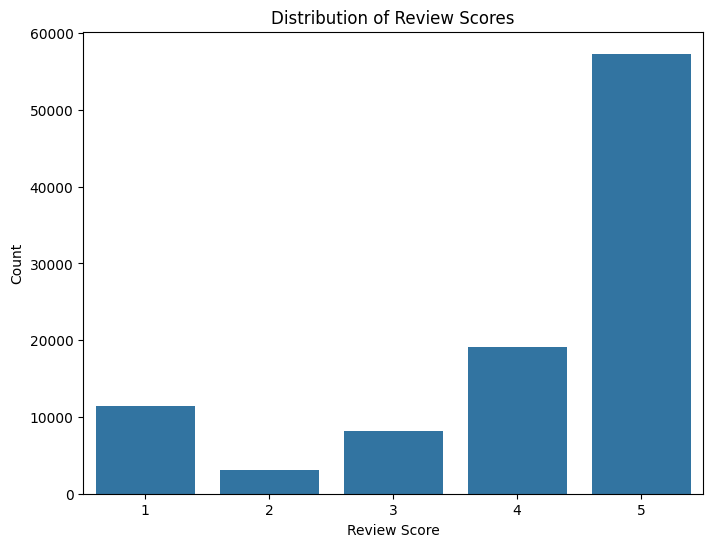

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=reviews_df)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()


### Pertanyaan 2: Bagaimana kondisi pengiriman barang keseluruhan saat ini?

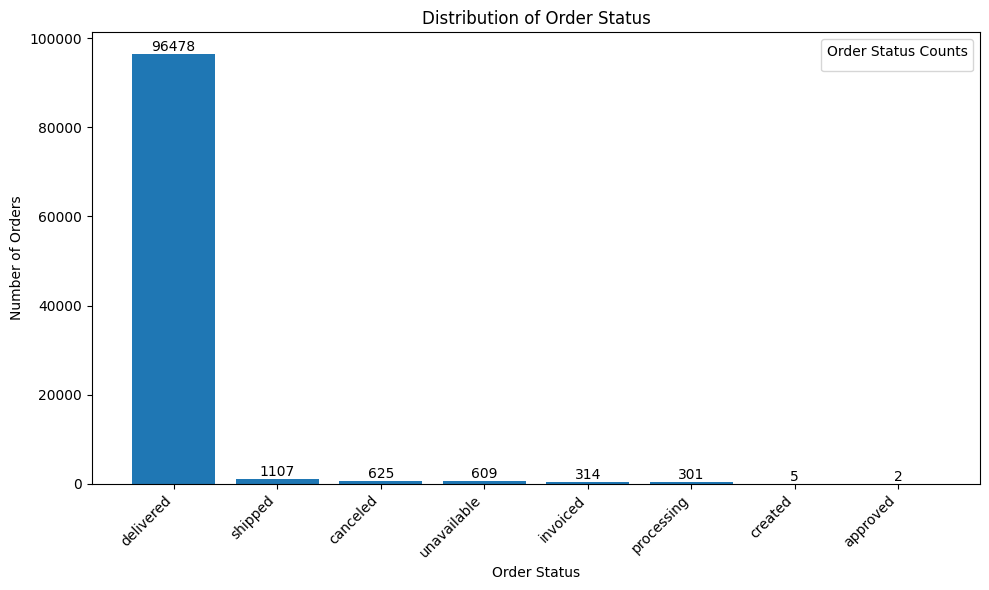

In [41]:
order_status_counts = orders_df['order_status'].value_counts()

# Membuat bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(order_status_counts.index, order_status_counts.values)
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Status')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Status Counts')
plt.tight_layout()
plt.show()

### Pertanyaan 3: Apa kategori produk paling laris di e-commerce kita?

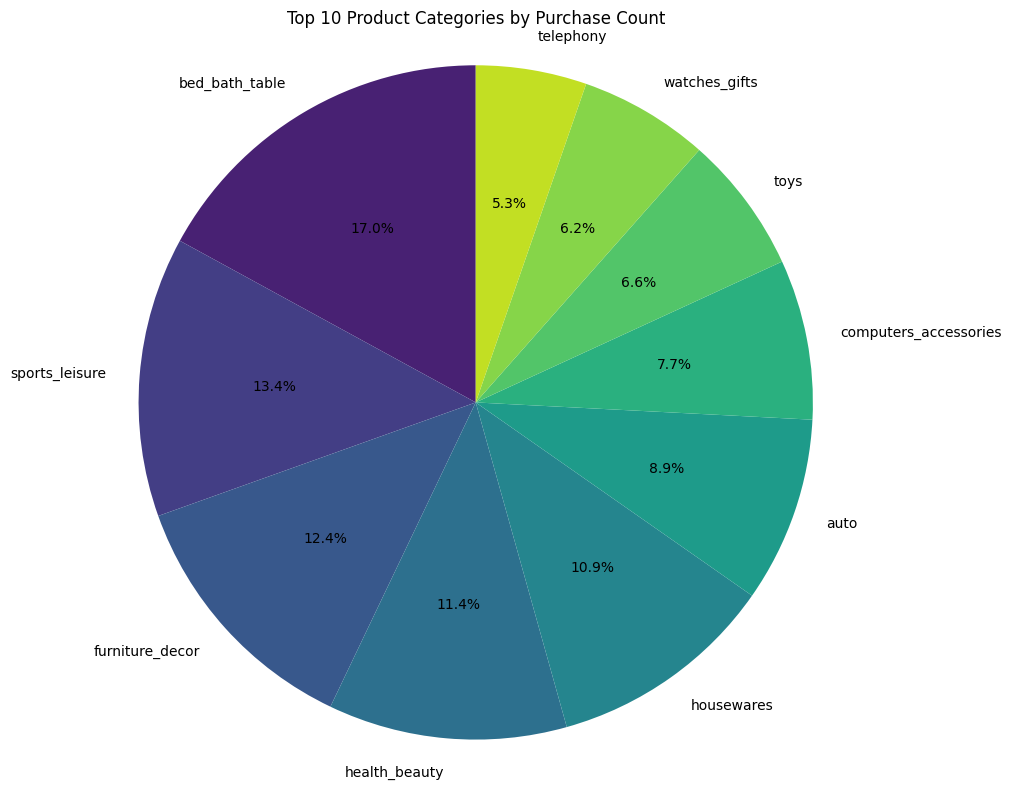

In [42]:
product_category_counts = product_df['product_category_name_english'].value_counts().head(10)

# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", 10))
plt.title('Top 10 Product Categories by Purchase Count')
plt.axis('equal')  # Menjaga proporsi lingkaran
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana tren penjualan harian kita?

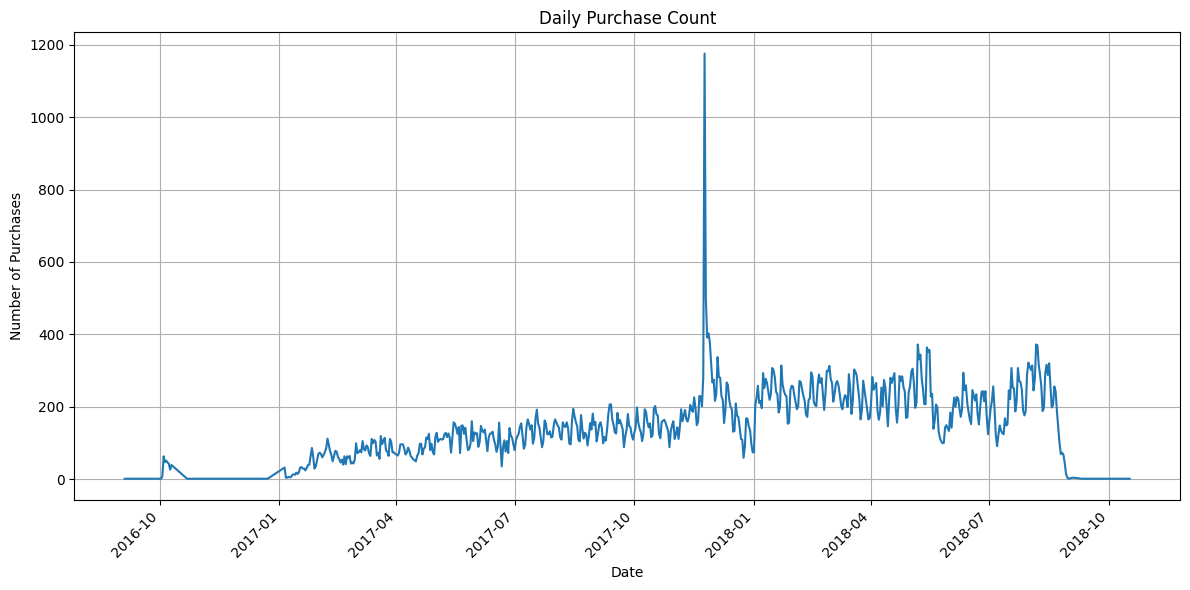

In [43]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

orders_df['order_purchase_date'] = orders_df['order_purchase_timestamp'].dt.date

daily_purchases = orders_df.groupby('order_purchase_date')['order_id'].count()

# Line Chart
plt.figure(figsize=(12, 6))
plt.plot(daily_purchases.index, daily_purchases.values)
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.title('Daily Purchase Count')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Regresi Linear Sederhana)



### Pertantaan 5: Apakah terdapat hubungan signifikan antara volume dan berat dari sebuah produk?

#### Panggil library yang diperlukan

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Jalankan program untuk regresi sederhana

In [45]:
X = products_df[['product_volume_cm3']]
y = products_df['product_weight_g']

# Split data menjadi training and testing sets dengan rasio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menjalankan Regresi Linier Sederhana
model = LinearRegression()

# Memakai data train
model.fit(X_train, y_train)

# Memakai prediksi dengan data test
y_pred = model.predict(X_test)

# Mengukur Mean Squared Error dan R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6721007.860852797
R-squared: 0.6096605914484468


Membuat garis plot regresi dengan scatterplot

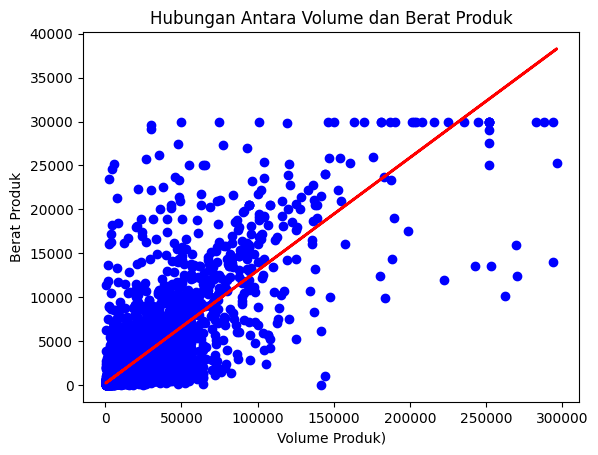

In [46]:
# Plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Volume Produk)')
plt.ylabel('Berat Produk')
plt.title('Hubungan Antara Volume dan Berat Produk')
plt.show()

**Insight:**


*   Mean Squared Error (MSE) menunjukkan sebaik apa model regresi menggambarkan hubungan antara kedua variabel. MSE > 100% menunjukkan bahwa terdapat error yang sangat besar, model tidak cukup baik untuk digambarkan secara linear
*   Koefisien Determinasi (R^2) menunjukkan kemampuan variabel Y (volume) menggambarkan variabel X (berat). Nilai 0.6096605914484468 menunjukkan sebanyak 60.97% variabel Y dapat digambarkan oleh variabel X.
*   Sebaran data dalam scatterplot tidak mengikuti garis lurus dalam model, sehingga disimpulkan tidak terdapat hubungan linear antara volume dan berat produk.



## Conclusion

- Conclution pertanyaan 1: Sebagian besar dari review memberikan skor 5 yang menandakan bahwa sebagian besar masyarakat yang membeli merasa puas/sangat puas
- Conclution pertanyaan 2: Sebagian besar produk terkirim (delivered), sementara kategori status lain bersifat minoritas.
- Conclusion pertanyaan 3: Grafik menunjukkan top 10 penjualan tertinggi. Dengan Bath_table menempati urutan pertama
- Conclusion pertanyaan 4: Grafik menunjukkan bahwa terjadi tren peningkatan yang lambat dalam 2 tahun kebelakang. Namun pada akhir tahun 2017, terjadi peningkatan purchase yang sangat signifikan, menyentuh angka >1000 purchase. Keren. Namun kemudian kembali ke tahap penjualan relatif normal lagi.
- Conclusion pertanyaan 5: Dengan R2 yang kecil (<70%) dan MSE yang besar (>100%), maka dikatakan tidak ada hubungan yang signifikan antara berat dan volume produk. Hal ini akan membantu dalam usaha pengembangan usaha e-commerce bila ingin merambah pada bisnis distribusi logistik kedepannya.

## Streamlit

In [51]:
from google.colab import files

# Export all_data
all_data_df.to_csv('all_data.csv', index=False)

# Download the CSV file
files.download('all_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
# prompt: Start streamlit

!pip install streamlit
!npm install localtunnel
!streamlit run app.py &>/content/logs.txt &



up to date, audited 23 packages in 806ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [53]:
! pip install streamlit -q

In [54]:
!wget -q -O - ipv4.icanhazip.com

35.196.140.110


In [55]:
! npm install -g localtunnel


changed 22 packages, and audited 23 packages in 5s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [56]:
! streamlit run /content/drive/MyDrive/Proyek_Akhir_Dicoding_Analisis_Data/Dashboard/dashboard.py & npx localtunnel --port 8501



your url is: https://slick-guests-knock.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.140.110:8501

  Stopping...
^C
